* This Project is initiated for a company called IFS that provides apartment services across various locations, geographically 
spread across thousands of square kilometers. This company provides apartment services such as Plumbing, Electrical, 
Air-conditioning, Masonry and Telecom works. They have a team of Field Service engineers that are located in various places 
in the geography and have remote access to the central office to get information about day to day service schedules. These 
engineers or technicians have electronic devices like tabs or laptops, which they use to get the daily service information. 
With this information to go to the customer sites carry out the necessary services and update the completion information from 
their devices back to the office. These technicians get their parts, accessories and others required for their activities via 
courier services. They can also get in touch with the central office for any troubleshooting help or coordination of any OEM help.
* Now they have competition, the new company is promising aggressive service clauses such as very difficult to achieve equipment 
downtime, and longer life for older equipment to quote just some of them. While wondering if these are realistic and achievable, 
IFS does not want to take the new comers for granted, they want to understand if their metrics are comparable and even possible 
to exceed. For this the company needs a thorough analysis of performance information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Acer/Desktop/IFS Data/ifs_data_mtbf.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,Company Code,Service Order Number,Customer Name,Location Address 1,Location Address 2,ZIP Code,Customer Phone Number,Reported Date/Time,Planned Start Date/Time,Actual Start Date/Time,...,Solution Statement,Service Technician,Office Support Contact,Currency,Order Amount,Contract Discount,Service tax Amount,Bill No,Bill Date/Time,Service Contract
0,I-1,A-1001,Wesley Mason,252 Jifina Avenue,Sejwegca,R6Z 4I1,(444) 965-4216,2018-09-18T08:47:54,2018-09-19T11:48:54,2018-09-19T11:48:54,...,our engineer will fix it,Jack,877-586-3224,$-,1419,142,128,IFS-100001,2018-09-22T12:36:43,414
1,I-1,A-1002,Joe Moreno,1850 Eduvi Boulevard,Kihinaezi,B7D 7U3,(444) 731-5255,2018-09-27T00:05:35,2018-09-28T10:31:56,2018-09-28T10:31:56,...,our engineer will fix it,Roy,877-586-3224,$-,1697,170,153,IFS-100002,2018-09-29T12:11:13,432
2,I-1,A-1003,Jeff Cummings,1827 Kocew Mill,Ulroldol,K2Z 7Q1,(525) 555-2312,2018-09-27T00:08:39,2018-09-28T10:44:03,2018-09-28T10:44:03,...,our engineer will fix it,Robert,877-586-3224,$-,765,77,69,IFS-100003,2018-09-29T15:53:33,445
3,I-1,A-1004,Eva Carr,1347 Eztuc Path,Rozahfow,B0M 9Y8,(528) 835-6265,2018-09-27T00:15:05,2018-09-28T11:53:11,2018-09-28T11:53:11,...,our engineer will fix it,Brad,877-586-3224,$-,191,19,17,IFS-100004,2018-10-02T13:12:00,516
4,I-1,A-1005,Kate Guzman,1077 Tuvib Point,Pabzeftar,H5A 4J3,(929) 839-7512,2018-09-27T00:19:02,2018-09-28T10:41:23,2018-09-28T10:41:23,...,our engineer will fix it,John,877-586-3224,$-,974,97,88,IFS-100005,2018-10-01T12:33:55,443


In [4]:
df.shape

(20000, 25)

In [5]:
# change the column names
df.rename(index=str, columns={'Company Code': 'com_code' , 'Service Order Number': 'serv_order_no',
                              'Bill No':'bill_no', 'Customer Name' : 'cust_name' , 'Location Address 1' : 'loc_add',
                              'Location Address 2' : 'city' , 'ZIP Code' : 'zip_code',
                              'Customer Phone Number' : 'cust_phn_no' , 'Reported Date/Time' : 'report_dt',
                              'Planned Start Date/Time' : 'plan_strt_dt' , 'Actual Start Date/Time':'actual_strt_dt',
                              'Planned Finish Date/Time':'plan_fnsh_dt' , 'Actual Finish Date/Time':'actual_fnsh_dt',
                              'Order Description':'order_desc' , 'Asset/Equipment Details':'asset_req',
                              'Problem Statement':'prob_stmnt' , 'Solution Statement':'sol_stmnt',
                              'Service Technician':'serv_tech_head' , 'Office Support Contact':'office_phn_no',
                              'Currency':'currency' , 'Order Amount':'order_amt',
                              'Contract Discount':'contract_disc' , 'Service tax Amount':'serv_tax_amt',
                              'Bill Date/Time':'bill_dt' , 'Service Contract':'serv_contract'}, inplace=True )

In [6]:
df.head()

,com_code,serv_order_no,cust_name,loc_add,city,zip_code,cust_phn_no,report_dt,plan_strt_dt,actual_strt_dt,...,sol_stmnt,serv_tech_head,office_phn_no,currency,order_amt,contract_disc,serv_tax_amt,bill_no,bill_dt,serv_contract
0,I-1,A-1001,Wesley Mason,252 Jifina Avenue,Sejwegca,R6Z 4I1,(444) 965-4216,2018-09-18T08:47:54,2018-09-19T11:48:54,2018-09-19T11:48:54,...,our engineer will fix it,Jack,877-586-3224,$-,1419,142,128,IFS-100001,2018-09-22T12:36:43,414
1,I-1,A-1002,Joe Moreno,1850 Eduvi Boulevard,Kihinaezi,B7D 7U3,(444) 731-5255,2018-09-27T00:05:35,2018-09-28T10:31:56,2018-09-28T10:31:56,...,our engineer will fix it,Roy,877-586-3224,$-,1697,170,153,IFS-100002,2018-09-29T12:11:13,432
2,I-1,A-1003,Jeff Cummings,1827 Kocew Mill,Ulroldol,K2Z 7Q1,(525) 555-2312,2018-09-27T00:08:39,2018-09-28T10:44:03,2018-09-28T10:44:03,...,our engineer will fix it,Robert,877-586-3224,$-,765,77,69,IFS-100003,2018-09-29T15:53:33,445
3,I-1,A-1004,Eva Carr,1347 Eztuc Path,Rozahfow,B0M 9Y8,(528) 835-6265,2018-09-27T00:15:05,2018-09-28T11:53:11,2018-09-28T11:53:11,...,our engineer will fix it,Brad,877-586-3224,$-,191,19,17,IFS-100004,2018-10-02T13:12:00,516
4,I-1,A-1005,Kate Guzman,1077 Tuvib Point,Pabzeftar,H5A 4J3,(929) 839-7512,2018-09-27T00:19:02,2018-09-28T10:41:23,2018-09-28T10:41:23,...,our engineer will fix it,John,877-586-3224,$-,974,97,88,IFS-100005,2018-10-01T12:33:55,443


## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 25 columns):
com_code          20000 non-null object
serv_order_no     20000 non-null object
cust_name         20000 non-null object
loc_add           20000 non-null object
city              20000 non-null object
zip_code          20000 non-null object
cust_phn_no       20000 non-null object
report_dt         20000 non-null object
plan_strt_dt      20000 non-null object
actual_strt_dt    20000 non-null object
plan_fnsh_dt      20000 non-null object
actual_fnsh_dt    20000 non-null object
order_desc        20000 non-null object
asset_req         20000 non-null object
prob_stmnt        20000 non-null object
sol_stmnt         20000 non-null object
serv_tech_head    20000 non-null object
office_phn_no     20000 non-null object
currency          20000 non-null object
order_amt         20000 non-null int64
contract_disc     20000 non-null int64
serv_tax_amt      20000 non-null int64
bill_no           2

## Check missing values for each column

In [8]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

serv_contract     0
actual_fnsh_dt    0
serv_order_no     0
cust_name         0
loc_add           0
city              0
zip_code          0
cust_phn_no       0
report_dt         0
plan_strt_dt      0
actual_strt_dt    0
plan_fnsh_dt      0
order_desc        0
bill_dt           0
asset_req         0
prob_stmnt        0
sol_stmnt         0
serv_tech_head    0
office_phn_no     0
currency          0
order_amt         0
contract_disc     0
serv_tax_amt      0
bill_no           0
com_code          0
dtype: int64

In [9]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,com_code,serv_order_no,cust_name,loc_add,city,zip_code,cust_phn_no,report_dt,plan_strt_dt,actual_strt_dt,...,sol_stmnt,serv_tech_head,office_phn_no,currency,order_amt,contract_disc,serv_tax_amt,bill_no,bill_dt,serv_contract


In [10]:
df['report_dt'] = pd.to_datetime(df['report_dt'])
df['plan_strt_dt'] = pd.to_datetime(df['plan_strt_dt'])
df['actual_strt_dt'] = pd.to_datetime(df['actual_strt_dt'])
df['plan_fnsh_dt'] = pd.to_datetime(df['plan_fnsh_dt'])
df['actual_fnsh_dt'] = pd.to_datetime(df['actual_fnsh_dt'])
df['bill_dt'] = pd.to_datetime(df['bill_dt'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 25 columns):
com_code          20000 non-null object
serv_order_no     20000 non-null object
cust_name         20000 non-null object
loc_add           20000 non-null object
city              20000 non-null object
zip_code          20000 non-null object
cust_phn_no       20000 non-null object
report_dt         20000 non-null datetime64[ns]
plan_strt_dt      20000 non-null datetime64[ns]
actual_strt_dt    20000 non-null datetime64[ns]
plan_fnsh_dt      20000 non-null datetime64[ns]
actual_fnsh_dt    20000 non-null datetime64[ns]
order_desc        20000 non-null object
asset_req         20000 non-null object
prob_stmnt        20000 non-null object
sol_stmnt         20000 non-null object
serv_tech_head    20000 non-null object
office_phn_no     20000 non-null object
currency          20000 non-null object
order_amt         20000 non-null int64
contract_disc     20000 non-null int64
serv_tax_amt      

In [12]:
df['order_amt'] = df['order_amt'].astype(np.float64)
df['contract_disc'] = df['contract_disc'].astype(np.float64)
df['serv_tax_amt'] = df['serv_tax_amt'].astype(np.float64)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 25 columns):
com_code          20000 non-null object
serv_order_no     20000 non-null object
cust_name         20000 non-null object
loc_add           20000 non-null object
city              20000 non-null object
zip_code          20000 non-null object
cust_phn_no       20000 non-null object
report_dt         20000 non-null datetime64[ns]
plan_strt_dt      20000 non-null datetime64[ns]
actual_strt_dt    20000 non-null datetime64[ns]
plan_fnsh_dt      20000 non-null datetime64[ns]
actual_fnsh_dt    20000 non-null datetime64[ns]
order_desc        20000 non-null object
asset_req         20000 non-null object
prob_stmnt        20000 non-null object
sol_stmnt         20000 non-null object
serv_tech_head    20000 non-null object
office_phn_no     20000 non-null object
currency          20000 non-null object
order_amt         20000 non-null float64
contract_disc     20000 non-null float64
serv_tax_amt  

In [14]:
df.head()

,com_code,serv_order_no,cust_name,loc_add,city,zip_code,cust_phn_no,report_dt,plan_strt_dt,actual_strt_dt,...,sol_stmnt,serv_tech_head,office_phn_no,currency,order_amt,contract_disc,serv_tax_amt,bill_no,bill_dt,serv_contract
0,I-1,A-1001,Wesley Mason,252 Jifina Avenue,Sejwegca,R6Z 4I1,(444) 965-4216,2018-09-18 08:47:54,2018-09-19 11:48:54,2018-09-19 11:48:54,...,our engineer will fix it,Jack,877-586-3224,$-,1419.0,142.0,128.0,IFS-100001,2018-09-22 12:36:43,414
1,I-1,A-1002,Joe Moreno,1850 Eduvi Boulevard,Kihinaezi,B7D 7U3,(444) 731-5255,2018-09-27 00:05:35,2018-09-28 10:31:56,2018-09-28 10:31:56,...,our engineer will fix it,Roy,877-586-3224,$-,1697.0,170.0,153.0,IFS-100002,2018-09-29 12:11:13,432
2,I-1,A-1003,Jeff Cummings,1827 Kocew Mill,Ulroldol,K2Z 7Q1,(525) 555-2312,2018-09-27 00:08:39,2018-09-28 10:44:03,2018-09-28 10:44:03,...,our engineer will fix it,Robert,877-586-3224,$-,765.0,77.0,69.0,IFS-100003,2018-09-29 15:53:33,445
3,I-1,A-1004,Eva Carr,1347 Eztuc Path,Rozahfow,B0M 9Y8,(528) 835-6265,2018-09-27 00:15:05,2018-09-28 11:53:11,2018-09-28 11:53:11,...,our engineer will fix it,Brad,877-586-3224,$-,191.0,19.0,17.0,IFS-100004,2018-10-02 13:12:00,516
4,I-1,A-1005,Kate Guzman,1077 Tuvib Point,Pabzeftar,H5A 4J3,(929) 839-7512,2018-09-27 00:19:02,2018-09-28 10:41:23,2018-09-28 10:41:23,...,our engineer will fix it,John,877-586-3224,$-,974.0,97.0,88.0,IFS-100005,2018-10-01 12:33:55,443


# # Visualization of Numerical(quantitative) and Categorical variables

In [15]:
quantitative = df.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index([u'order_amt', u'contract_disc', u'serv_tax_amt', u'serv_contract'], dtype='object')


In [16]:
df[quantitative].describe()

,order_amt,contract_disc,serv_tax_amt,serv_contract
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,1531.009550,153.148350,137.836650,4761.103000
std,852.703556,85.269721,76.743304,2743.584092
min,50.000000,5.000000,5.000000,414.000000
25%,794.000000,79.000000,72.000000,2384.750000
50%,1543.000000,154.000000,139.000000,4517.500000
75%,2266.000000,227.000000,204.000000,6995.000000
max,3000.000000,300.000000,270.000000,10329.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CECDBA8>,
      dtype=object)

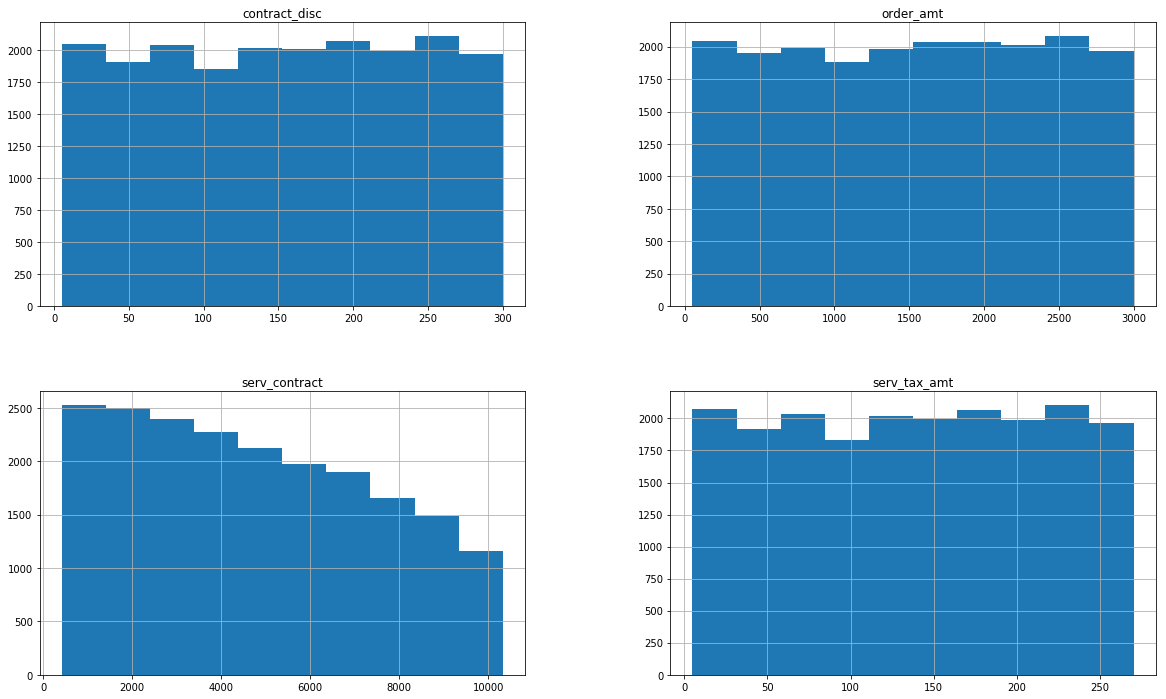

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 12
df[quantitative].hist()

## # Categorical variables - Feature engineering.

In [18]:
categorical = df.select_dtypes(include = ["object"]).keys()
print(categorical)

Index([u'com_code', u'serv_order_no', u'cust_name', u'loc_add', u'city',
       u'zip_code', u'cust_phn_no', u'order_desc', u'asset_req', u'prob_stmnt',
       u'sol_stmnt', u'serv_tech_head', u'office_phn_no', u'currency',
       u'bill_no'],
      dtype='object')


In [19]:
df.serv_tech_head.nunique(),df.serv_order_no.nunique(),df.order_desc.nunique(),df.asset_req.nunique(),df.bill_no.nunique()

(6, 20000, 5, 2, 20000)

In [20]:
df.cust_name.nunique(),df.loc_add.nunique(),df.city.nunique(),df.zip_code.nunique(),df.cust_phn_no.nunique()

(9916, 9916, 9916, 9913, 9916)

In [21]:
df.prob_stmnt.nunique(),df.sol_stmnt.nunique(),df.com_code.nunique(),df.office_phn_no.nunique(),df.currency.nunique()

(1, 1, 1, 1, 1)

In [22]:
df.serv_tech_head.unique()

array([u'Jack', u'Roy', u'Robert', u'Brad', u'John', u'Peter'],
      dtype=object)

In [23]:
df.order_desc.unique()

array([u'Plumbing', u'Telecom', u'Electrical', u'Masonry',
       u'Air Conditioning'], dtype=object)

## Deleting unnecessary features from the dataset

###  Some features like "com_code" , "cust_name" , "loc_add" , "zip_code" , "cust_phn_no" , "currency" , "office_phn_no" , "serv_tech_head" , "prob_stmnt" and "sol_stmnt" have no such importance in the analysis work so, we are dropping these features.

### And by analyzing the data we got to know that "plan_strt_dt" is exact same as "actual_strt_dt" so, we are dropping "plan_strt_dt"

In [24]:
df.drop(['com_code','cust_name','loc_add','zip_code','cust_phn_no','plan_strt_dt','currency','office_phn_no','serv_tech_head','prob_stmnt','sol_stmnt'], axis=1, inplace=True)

In [25]:
df_new = df

In [26]:
df_new.shape

(20000, 14)

In [27]:
order_desc_freq=pd.crosstab(index=df_new['order_desc'],columns="count")  
order_desc_freq_rel = order_desc_freq/order_desc_freq.sum() 
order_desc_freq_rel.sort_values('count', ascending=False) #relative frequencies

col_0,count
order_desc,
Telecom,0.27540
Plumbing,0.23750
Electrical,0.18815
Air Conditioning,0.17310
Masonry,0.12585


In [28]:
def order_desc_categorizer(row):
   row = str(row)
   category = ""
   if "Telecom" in row:
       category = 5
   elif "Plumbing" in row:
       category = 4
   elif "Electrical" in row:
       category = 3
   elif "Air Conditioning" in row:
       category = 2
   else:
       category = 1
   return category 

df_new["order_desc"] = df_new.apply(lambda row:order_desc_categorizer(row["order_desc"]),axis=1)

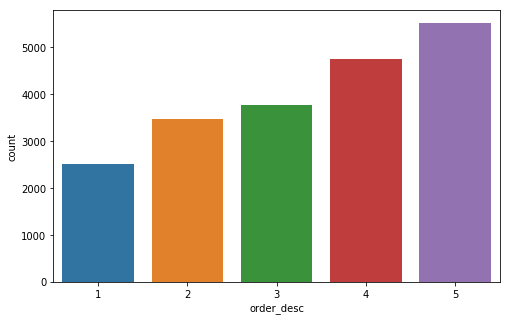

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
sns.countplot(df_new["order_desc"])

* we can see that the max no. of services required were of "Telecom" and the least were of "Masonry".

In [30]:
df_new['asset_req'] = np.where(df_new['asset_req']=='Y', '1', '0')
df_new['asset_req'] = df_new['asset_req'].astype(dtype='int64')

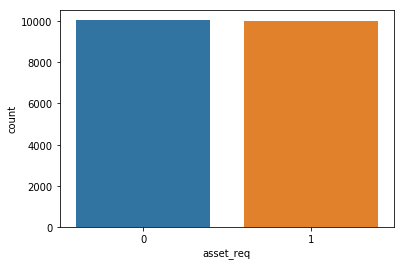

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4
sns.countplot(df_new["asset_req"])

* we can see that the no. of times an extra equipment is required in services from central office is lower than the no. of times they are not required. 

In [32]:
df_new.describe().round(2)

,order_desc,asset_req,order_amt,contract_disc,serv_tax_amt,serv_contract
count,20000.00,20000.0,20000.00,20000.00,20000.00,20000.00
mean,3.36,0.5,1531.01,153.15,137.84,4761.10
std,1.37,0.5,852.70,85.27,76.74,2743.58
min,1.00,0.0,50.00,5.00,5.00,414.00
25%,2.00,0.0,794.00,79.00,72.00,2384.75
50%,4.00,0.0,1543.00,154.00,139.00,4517.50
75%,5.00,1.0,2266.00,227.00,204.00,6995.00
max,5.00,1.0,3000.00,300.00,270.00,10329.00


## Add the column -> bill_amt

In [33]:
df_new['bill_amt'] = df_new['order_amt'] - df_new['contract_disc'] + df_new['serv_tax_amt']

In [34]:
df_new['bill_amt'] = df_new['bill_amt'].astype(np.float64)

### After calculating Billing Amount we don't need features like "order_amt","contract_disc","serv_tax_amt" so, we dropped them.

* the "Contract Discount" is 10% for all users
* the "Service Tax" is also 10% for all users

In [35]:
df_new.drop(['order_amt','contract_disc','serv_tax_amt'], axis=1, inplace=True)

In [36]:
df_new.head()

,serv_order_no,city,report_dt,actual_strt_dt,plan_fnsh_dt,actual_fnsh_dt,order_desc,asset_req,bill_no,bill_dt,serv_contract,bill_amt
0,A-1001,Sejwegca,2018-09-18 08:47:54,2018-09-19 11:48:54,2018-09-25 11:48:00,2018-09-22 12:36:43,4,1,IFS-100001,2018-09-22 12:36:43,414,1405.0
1,A-1002,Kihinaezi,2018-09-27 00:05:35,2018-09-28 10:31:56,2018-10-04 10:31:00,2018-09-29 12:11:13,5,1,IFS-100002,2018-09-29 12:11:13,432,1680.0
2,A-1003,Ulroldol,2018-09-27 00:08:39,2018-09-28 10:44:03,2018-10-04 10:44:00,2018-09-29 15:53:33,3,0,IFS-100003,2018-09-29 15:53:33,445,757.0
3,A-1004,Rozahfow,2018-09-27 00:15:05,2018-09-28 11:53:11,2018-10-04 11:53:00,2018-10-02 13:12:00,1,0,IFS-100004,2018-10-02 13:12:00,516,189.0
4,A-1005,Pabzeftar,2018-09-27 00:19:02,2018-09-28 10:41:23,2018-10-04 10:41:23,2018-10-01 12:33:55,5,0,IFS-100005,2018-10-01 12:33:55,443,965.0


In [37]:
df_new.insert(loc=8, column='year_month', value=df_new['report_dt'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=9, column='month', value=df_new.report_dt.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=10, column='day', value=(df_new.report_dt.dt.dayofweek)+1)
df_new.insert(loc=11, column='hour', value=df_new.report_dt.dt.hour)

# Exploratory Data Analysis (EDA)

## Checking Co-relation between each and every feature of the dataset

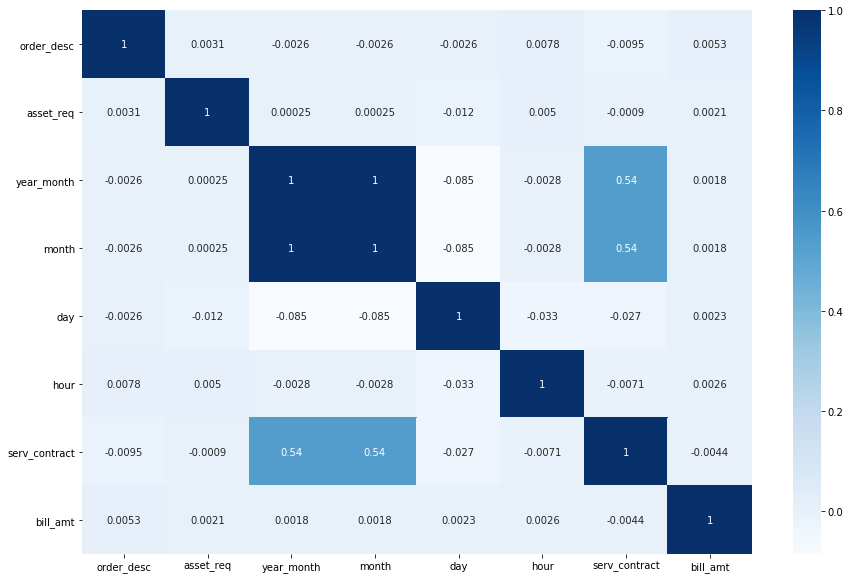

In [38]:
corr = df_new.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='Blues',annot=True)

## How many orders made by the customers?

In [39]:
df_new.groupby(by=['serv_contract','city'], as_index=False)['bill_no'].count().head()

,serv_contract,city,bill_no
0,414,Sejwegca,1
1,415,Jipuri,3
2,416,Uhezufen,2
3,417,Heisla,3
4,418,Vijipab,3


####  * serv_contract acts like a customer_id in this dataset

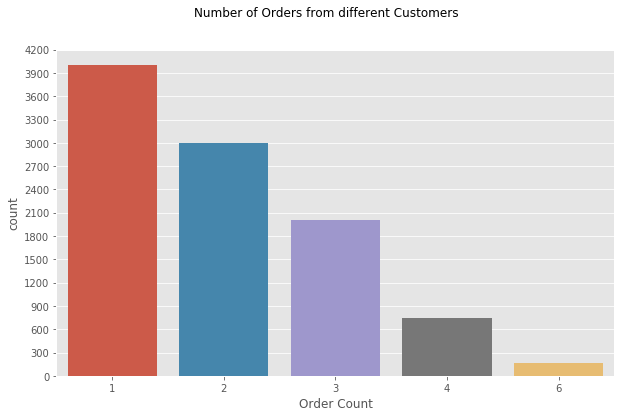

In [91]:
orders = df_new.groupby(by=['serv_contract','city'], as_index=False)['bill_no'].count()

from matplotlib.pyplot import suptitle, show
suptitle("Number of Orders from different Customers")
rcParams['figure.figsize'] = 9, 6
ax = sns.countplot(orders.bill_no)
ax.set_yticks([t*300 for t in range(0,15)])
ax.set_xlabel("Order Count")
show()

##  Check TOP 5 most number of orders

In [41]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='bill_no', ascending=False).head()

The TOP 5 customers with most number of orders...


,serv_contract,city,bill_no
573,987,Jatoozi,6
678,1092,Tuhoceto,6
1662,2076,Olugaedu,6
3046,3460,Muhlulat,6
1853,2267,Wutoel,6


## How much money spent by the customers?

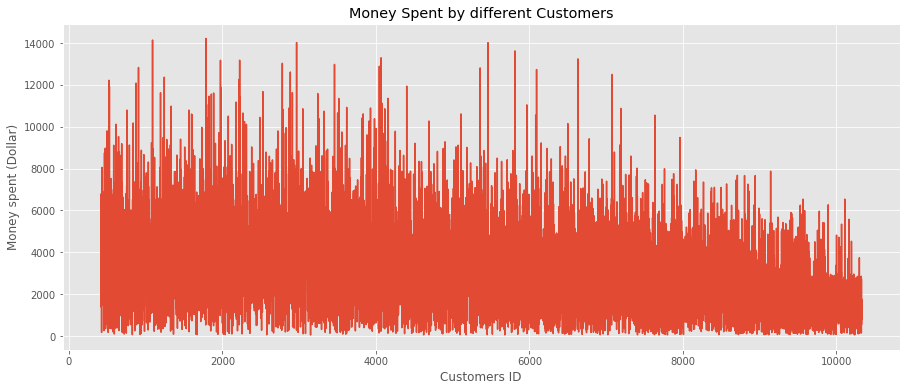

In [42]:
money_spent = df_new.groupby(by=['serv_contract','city'], as_index=False)['bill_amt'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.serv_contract, money_spent.bill_amt)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent by different Customers')
plt.show()

## Check TOP 5 highest money spent 


In [43]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='bill_amt', ascending=False).head()

The TOP 5 customers with highest money spent...


,serv_contract,city,bill_amt
1372,1786,Wizneev,14220.0
675,1089,Wukpeovu,14145.0
2552,2966,Keefom,14025.0
5046,5460,Dunonoc,14020.0
5397,5811,Zarublic,13625.0


# Discover patterns for Number of Orders

## How many orders (per month)?

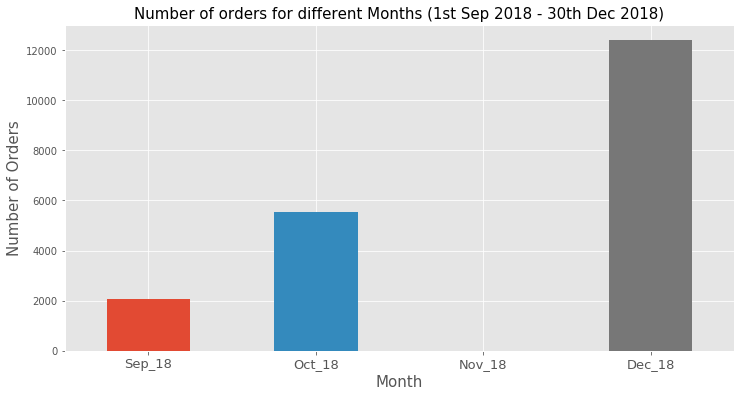

In [95]:
ax = df_new.groupby('bill_no')['year_month'].unique().value_counts().sort_index().plot('bar',figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Sep 2018 - 30th Dec 2018)',fontsize=15)
ax.set_xticklabels(('Sep_18','Oct_18','Nov_18','Dec_18'), rotation='horizontal', fontsize=13)
plt.show()

## How many orders (per day)?

In [45]:
df_new.groupby('bill_no')['day'].unique().value_counts().sort_index()

[1]    3694
[2]    3414
[3]    3195
[4]    3663
[5]    1655
[6]    1049
[7]    3330
Name: day, dtype: int64

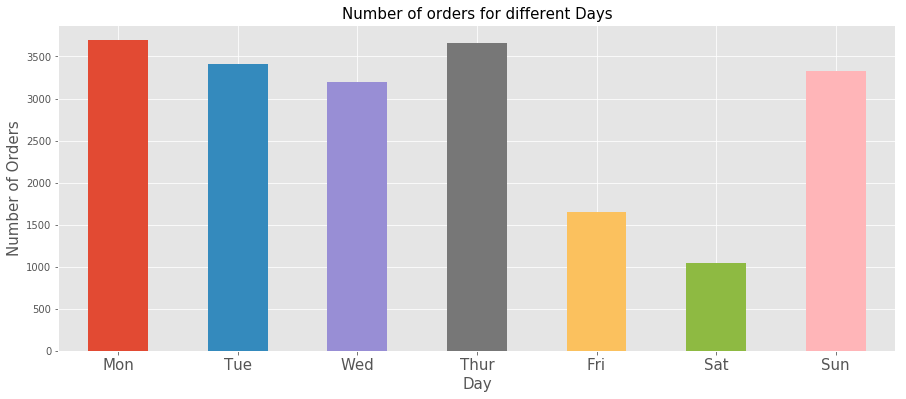

In [46]:
ax = df_new.groupby('bill_no')['day'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sat','Sun'), rotation='horizontal', fontsize=15)
plt.show()

## How many orders (per hour)?

In [47]:
df_new.groupby('bill_no')['hour'].unique().value_counts().iloc[:-1].sort_index()

[0]       94
[1]       44
[2]       31
[4]       51
[5]       67
[6]      216
[7]      654
[8]     1306
[9]     1700
[10]    1841
[11]    1882
[12]    1757
[13]    1703
[14]    1675
[15]    1624
[16]    1525
[17]    1076
[18]     878
[19]     580
[20]     444
[21]     380
[22]     256
[23]     185
Name: hour, dtype: int64

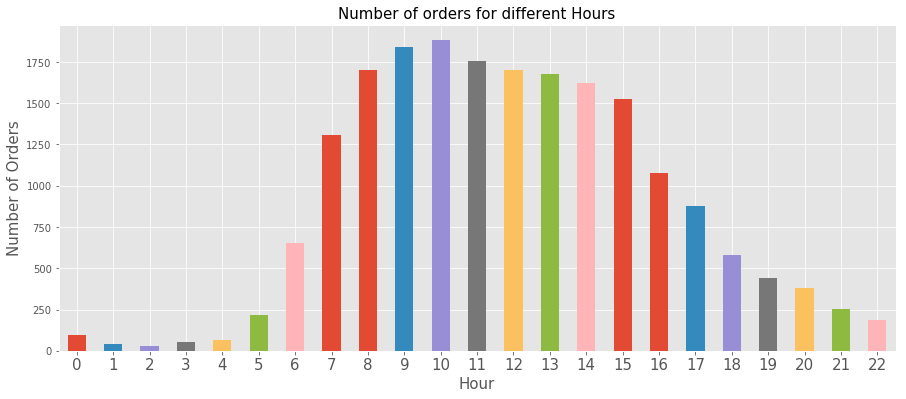

In [48]:
ax = df_new.groupby('bill_no')['hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(0,23), rotation='horizontal', fontsize=15)
plt.show()

# Discover patterns for each City

In [49]:
df_new.head()

,serv_order_no,city,report_dt,actual_strt_dt,plan_fnsh_dt,actual_fnsh_dt,order_desc,asset_req,year_month,month,day,hour,bill_no,bill_dt,serv_contract,bill_amt
0,A-1001,Sejwegca,2018-09-18 08:47:54,2018-09-19 11:48:54,2018-09-25 11:48:00,2018-09-22 12:36:43,4,1,201809,9,2,8,IFS-100001,2018-09-22 12:36:43,414,1405.0
1,A-1002,Kihinaezi,2018-09-27 00:05:35,2018-09-28 10:31:56,2018-10-04 10:31:00,2018-09-29 12:11:13,5,1,201809,9,4,0,IFS-100002,2018-09-29 12:11:13,432,1680.0
2,A-1003,Ulroldol,2018-09-27 00:08:39,2018-09-28 10:44:03,2018-10-04 10:44:00,2018-09-29 15:53:33,3,0,201809,9,4,0,IFS-100003,2018-09-29 15:53:33,445,757.0
3,A-1004,Rozahfow,2018-09-27 00:15:05,2018-09-28 11:53:11,2018-10-04 11:53:00,2018-10-02 13:12:00,1,0,201809,9,4,0,IFS-100004,2018-10-02 13:12:00,516,189.0
4,A-1005,Pabzeftar,2018-09-27 00:19:02,2018-09-28 10:41:23,2018-10-04 10:41:23,2018-10-01 12:33:55,5,0,201809,9,4,0,IFS-100005,2018-10-01 12:33:55,443,965.0


## How much money spent by each city?

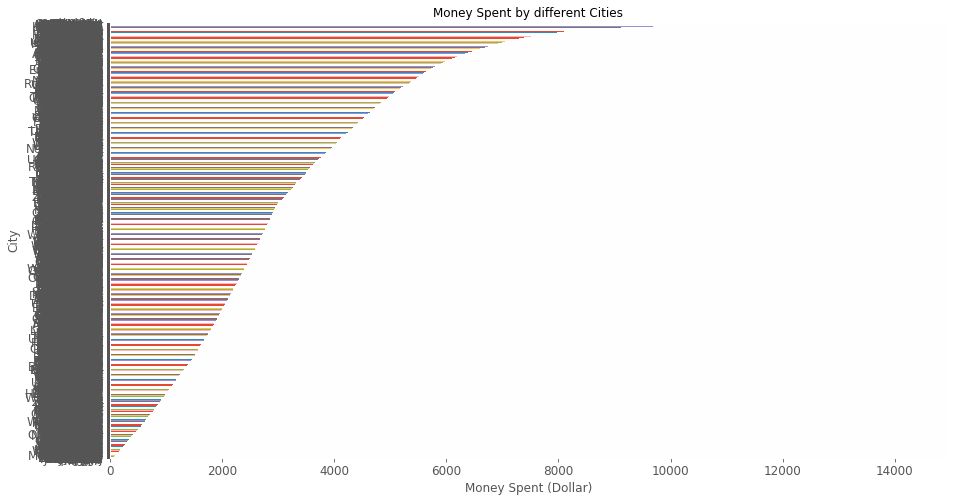

In [94]:
group_country_amount_spent = df_new.groupby('city')['bill_amt'].sum().sort_values()

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Money Spent by different Cities', fontsize=12)
plt.show()

## # Calculating "Downtime"

In [51]:
df_new['downtime']=df_new['actual_fnsh_dt']-df_new['report_dt']

In [52]:
df_new.downtime.nunique()

19530

In [93]:
df_new['downtime'].describe()

count                     20000
mean     4 days 10:26:11.786299
std      1 days 17:20:26.023129
min             1 days 01:29:44
25%             2 days 22:31:26
50%      4 days 10:03:58.500000
75%      5 days 22:28:04.500000
max             7 days 19:04:43
Name: downtime, dtype: object

#### * Downtime ranges from "1 day 1 hr and 29 mins to 7 days 19 hrs and 4 mins" approximately.

## # Calculating "Mean Time To Repair"

In [55]:
df_new['time_to_repair']=df_new['actual_fnsh_dt']-df_new['actual_strt_dt']

In [56]:
df_new.time_to_repair.nunique()

19247

In [57]:
df_new['time_to_repair'].mean()

Timedelta('3 days 10:41:50.947650')

#### * Mean Time To Repair is "3 days 10 hrs and 41 mins" approximately.

## # Calculating "Mean Time Between Failure"

In [58]:
df_new['prev_order_actual_fnsh_dt'] = df_new['actual_fnsh_dt'].shift()

In [68]:
df_new['mtbf']=df_new['prev_order_actual_fnsh_dt']-df_new['report_dt']
df_new.head(3)

,serv_order_no,city,report_dt,actual_strt_dt,plan_fnsh_dt,actual_fnsh_dt,order_desc,asset_req,year_month,month,...,bill_no,bill_dt,serv_contract,bill_amt,downtime,time_to_repair,prev_order_actual_fnsh_dt,mtbf,ttl_elaps_tm,dwn_tm_ratio
0,A-1001,Sejwegca,2018-09-18 08:47:54,2018-09-19 11:48:54,2018-09-25 11:48:00,2018-09-22 12:36:43,4,1,201809,9,...,IFS-100001,2018-09-22 12:36:43,414,1405.0,4 days 03:48:49,3 days 00:47:49,NaT,NaT,NaT,NaN
1,A-1002,Kihinaezi,2018-09-27 00:05:35,2018-09-28 10:31:56,2018-10-04 10:31:00,2018-09-29 12:11:13,5,1,201809,9,...,IFS-100002,2018-09-29 12:11:13,432,1680.0,2 days 12:05:38,1 days 01:39:17,2018-09-22 12:36:43,-5 days +12:31:08,6 days 23:34:30,0.358609
2,A-1003,Ulroldol,2018-09-27 00:08:39,2018-09-28 10:44:03,2018-10-04 10:44:00,2018-09-29 15:53:33,3,0,201809,9,...,IFS-100003,2018-09-29 15:53:33,445,757.0,2 days 15:44:54,1 days 05:09:30,2018-09-29 12:11:13,2 days 12:02:34,0 days 03:42:20,17.203448


In [69]:
df_new['mtbf'].mean()

Timedelta('4 days 10:18:57.285164')

#### * Mean Time Between Failure is "4 days 10 hrs and 18 mins" approximately.

## # Calculating "Downtime Ratio" i.e. (downtime/total elapsed time)

In [70]:
df_new['ttl_elaps_tm']=df_new['actual_fnsh_dt']-df_new['prev_order_actual_fnsh_dt']
df_new.head(3)

,serv_order_no,city,report_dt,actual_strt_dt,plan_fnsh_dt,actual_fnsh_dt,order_desc,asset_req,year_month,month,...,bill_no,bill_dt,serv_contract,bill_amt,downtime,time_to_repair,prev_order_actual_fnsh_dt,mtbf,ttl_elaps_tm,dwn_tm_ratio
0,A-1001,Sejwegca,2018-09-18 08:47:54,2018-09-19 11:48:54,2018-09-25 11:48:00,2018-09-22 12:36:43,4,1,201809,9,...,IFS-100001,2018-09-22 12:36:43,414,1405.0,4 days 03:48:49,3 days 00:47:49,NaT,NaT,NaT,NaN
1,A-1002,Kihinaezi,2018-09-27 00:05:35,2018-09-28 10:31:56,2018-10-04 10:31:00,2018-09-29 12:11:13,5,1,201809,9,...,IFS-100002,2018-09-29 12:11:13,432,1680.0,2 days 12:05:38,1 days 01:39:17,2018-09-22 12:36:43,-5 days +12:31:08,6 days 23:34:30,0.358609
2,A-1003,Ulroldol,2018-09-27 00:08:39,2018-09-28 10:44:03,2018-10-04 10:44:00,2018-09-29 15:53:33,3,0,201809,9,...,IFS-100003,2018-09-29 15:53:33,445,757.0,2 days 15:44:54,1 days 05:09:30,2018-09-29 12:11:13,2 days 12:02:34,0 days 03:42:20,17.203448


In [71]:
df_new['dwn_tm_ratio']=df_new['downtime']/df_new['ttl_elaps_tm']
df_new.head(3)

,serv_order_no,city,report_dt,actual_strt_dt,plan_fnsh_dt,actual_fnsh_dt,order_desc,asset_req,year_month,month,...,bill_no,bill_dt,serv_contract,bill_amt,downtime,time_to_repair,prev_order_actual_fnsh_dt,mtbf,ttl_elaps_tm,dwn_tm_ratio
0,A-1001,Sejwegca,2018-09-18 08:47:54,2018-09-19 11:48:54,2018-09-25 11:48:00,2018-09-22 12:36:43,4,1,201809,9,...,IFS-100001,2018-09-22 12:36:43,414,1405.0,4 days 03:48:49,3 days 00:47:49,NaT,NaT,NaT,NaN
1,A-1002,Kihinaezi,2018-09-27 00:05:35,2018-09-28 10:31:56,2018-10-04 10:31:00,2018-09-29 12:11:13,5,1,201809,9,...,IFS-100002,2018-09-29 12:11:13,432,1680.0,2 days 12:05:38,1 days 01:39:17,2018-09-22 12:36:43,-5 days +12:31:08,6 days 23:34:30,0.358609
2,A-1003,Ulroldol,2018-09-27 00:08:39,2018-09-28 10:44:03,2018-10-04 10:44:00,2018-09-29 15:53:33,3,0,201809,9,...,IFS-100003,2018-09-29 15:53:33,445,757.0,2 days 15:44:54,1 days 05:09:30,2018-09-29 12:11:13,2 days 12:02:34,0 days 03:42:20,17.203448


In [74]:
df_new['dwn_tm_ratio'].mean()

11.720607148171718

#### * Downtime Ratio is "11.72" approximately.

## # Calculating "Average Response Time"

In [75]:
df_new['response_time']=df_new['actual_strt_dt']-df_new['report_dt']

In [76]:
df_new.response_time.nunique()

17273

In [77]:
df_new['response_time'].mean()

Timedelta('0 days 23:44:20.838650')

#### * Average Response Time is "23 hrs and 44 mins" approximately.

## # Calculating "Uptime"

In [78]:
df_new['uptime']=df_new['report_dt']-df_new['prev_order_actual_fnsh_dt']
df_new.head(3)

,serv_order_no,city,report_dt,actual_strt_dt,plan_fnsh_dt,actual_fnsh_dt,order_desc,asset_req,year_month,month,...,serv_contract,bill_amt,downtime,time_to_repair,prev_order_actual_fnsh_dt,mtbf,ttl_elaps_tm,dwn_tm_ratio,response_time,uptime
0,A-1001,Sejwegca,2018-09-18 08:47:54,2018-09-19 11:48:54,2018-09-25 11:48:00,2018-09-22 12:36:43,4,1,201809,9,...,414,1405.0,4 days 03:48:49,3 days 00:47:49,NaT,NaT,NaT,NaN,1 days 03:01:00,NaT
1,A-1002,Kihinaezi,2018-09-27 00:05:35,2018-09-28 10:31:56,2018-10-04 10:31:00,2018-09-29 12:11:13,5,1,201809,9,...,432,1680.0,2 days 12:05:38,1 days 01:39:17,2018-09-22 12:36:43,-5 days +12:31:08,6 days 23:34:30,0.358609,1 days 10:26:21,4 days 11:28:52
2,A-1003,Ulroldol,2018-09-27 00:08:39,2018-09-28 10:44:03,2018-10-04 10:44:00,2018-09-29 15:53:33,3,0,201809,9,...,445,757.0,2 days 15:44:54,1 days 05:09:30,2018-09-29 12:11:13,2 days 12:02:34,0 days 03:42:20,17.203448,1 days 10:35:24,-3 days +11:57:26


In [92]:
df_new['uptime'].describe()

count                       19999
mean     -5 days +13:41:02.714835
std        1 days 18:01:30.786275
min             -8 days +04:59:24
25%             -6 days +01:32:56
50%             -5 days +13:59:17
75%             -3 days +01:32:01
max              37 days 02:18:41
Name: uptime, dtype: object

#### * Uptime ranges from "8 days 4 hrs and 59 mins to 37 days 2 hrs and 18 mins" approximately.

## Results obtained from Exploratory Data Analysis (EDA)

1. The maximum no. of orders that the customers had made were 5.(i.e. all the 5 services from the company)
2. The customer with the highest money spent on purchases comes from "Wizneev" city.
3. Top 5 cities spending highest amount of money are as below:
    * Wizneev	
    * Wukpeovu	
    * Keefom	
    * Dunonoc	
    * Zarublic
4. December 2018 has the maximun service orders
5. November 2018 has neglible service orders
6. Services on Mondays are max. whereas on Saturday they're the least.
7. The company receives the highest number of orders at 12:00 noon and starts decreasing afterward in a day.
8. The company receives the highest number of orders for "Telecom" services and least for "Masonry" services.
9. Downtime ranges from "1 day 1 hr and 29 mins to 7 days 19 hrs and 4 mins" approximately.
10. Mean Time To Repair is "3 days 10 hrs and 41 mins" approximately.
11. Mean Time Between Failure is "4 days 10 hrs and 18 mins" approximately.
12. Downtime Ratio is "11.72" approximately.
13. Average Response time is 23 hrs and 44 mins.
14. Uptime ranges from "8 days 4 hrs and 59 mins to 37 days 2 hrs and 18 mins" approximately.
15. Spare parts/equipments from central office are required in approx. 49% of cases. 